In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from matplotlib.image import imread
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, auc,ConfusionMatrixDisplay #plot_roc_curve,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve,roc_auc_score, balanced_accuracy_score,classification_report
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
#from sklearn.metrics import plot_confusion_matrix
import pickle

pd.set_option('display.max_columns', 500)
sns.set()

sns.set_style('darkgrid')

In [152]:
df = pd.read_csv('diabetes2.csv')

In [1]:
df.head(20)

NameError: name 'df' is not defined

In [154]:
df.shape

(520, 17)

In [155]:
train,test = train_test_split(df,test_size=0.2,random_state=123)

In [156]:
train.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
42,50,Female,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Positive
376,43,Male,No,No,No,Yes,No,Yes,No,Yes,No,Yes,No,No,Yes,No,Negative
184,48,Female,Yes,Yes,Yes,No,Yes,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,Positive
41,50,Female,Yes,Yes,Yes,No,Yes,No,No,No,No,Yes,Yes,No,No,No,Positive
494,36,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [157]:
# reset the index after spliting
train.reset_index(inplace=True, drop = True)

In [158]:
train.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,50,Female,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Positive
1,43,Male,No,No,No,Yes,No,Yes,No,Yes,No,Yes,No,No,Yes,No,Negative
2,48,Female,Yes,Yes,Yes,No,Yes,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,Positive
3,50,Female,Yes,Yes,Yes,No,Yes,No,No,No,No,Yes,Yes,No,No,No,Positive
4,36,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [159]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [160]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [161]:
print(train.shape)
print(test.shape)
print(df.shape)

(416, 17)
(104, 17)
(520, 17)


## Data cleaning


In [162]:
train.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [163]:
train.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

In [164]:
train.duplicated().sum()

200

In [165]:
#A7
X_train = train.drop(['class'],axis=1) #feature varibale
y_train = train['class'] #target variable

In [166]:
col1 = X_train.columns

In [167]:
col1

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

In [168]:
train

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,50,Female,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Positive
1,43,Male,No,No,No,Yes,No,Yes,No,Yes,No,Yes,No,No,Yes,No,Negative
2,48,Female,Yes,Yes,Yes,No,Yes,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,Positive
3,50,Female,Yes,Yes,Yes,No,Yes,No,No,No,No,Yes,Yes,No,No,No,Positive
4,36,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,35,Female,Yes,Yes,No,No,No,No,Yes,No,No,No,No,No,Yes,No,Positive
412,64,Male,No,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Negative
413,68,Male,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,No,Yes,No,No,No,Positive
414,45,Female,No,No,No,No,Yes,No,Yes,Yes,No,No,Yes,No,No,No,Positive


In [169]:
train1 = train.copy()

In [170]:
for label,content in train1.items():
    if pd.api.types.is_string_dtype(content):
        train1[label] = content.astype("category").cat.as_ordered()

In [171]:
for label, content in train1.items():
    if pd.api.types.is_categorical_dtype(content):
        train1[label] = pd.Categorical(content).codes

In [172]:
train1

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,50,0,0,1,0,1,1,0,1,1,1,1,1,1,0,0,1
1,43,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0
2,48,0,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1
3,50,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0,1
4,36,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,35,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1
412,64,1,0,0,0,1,1,0,1,1,1,1,0,1,1,0,0
413,68,1,1,1,0,0,1,0,1,1,1,0,1,0,0,0,1
414,45,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1


In [173]:
#A7
X_train = train1.drop(['class'],axis=1) #feature varibale
y_train = train1['class'] #target variable

In [174]:
 X_train

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,50,0,0,1,0,1,1,0,1,1,1,1,1,1,0,0
1,43,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0
2,48,0,1,1,1,0,1,1,0,0,1,1,0,1,1,1
3,50,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0
4,36,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,35,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0
412,64,1,0,0,0,1,1,0,1,1,1,1,0,1,1,0
413,68,1,1,1,0,0,1,0,1,1,1,0,1,0,0,0
414,45,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0


In [175]:
test

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
264,38,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Positive
327,47,Male,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,Yes,Negative
289,40,Male,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,Negative
172,60,Male,Yes,No,No,No,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
326,53,Male,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,Yes,Yes,No,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Negative
347,40,Male,No,Yes,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Negative
101,85,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,Positive
155,33,Male,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,Positive


In [176]:
test1 = test.copy()

In [177]:
for label,content in test1.items():
    if pd.api.types.is_string_dtype(content):
        test1[label] = content.astype("category").cat.as_ordered()

In [178]:
for label, content in test1.items():
    if pd.api.types.is_categorical_dtype(content):
        test1[label] = pd.Categorical(content).codes

In [179]:
test1

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
264,38,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1
327,47,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
289,40,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
172,60,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1
326,53,1,0,0,0,1,0,0,1,1,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,42,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
347,40,1,0,1,1,1,0,0,1,1,0,0,1,1,0,0,0
101,85,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1
155,33,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [180]:
#A7
X_test = test1.drop(['class'],axis=1) #feature varibale
y_test = test1['class'] #target variable

In [181]:
X_test

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
264,38,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0
327,47,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1
289,40,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
172,60,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0
326,53,1,0,0,0,1,0,0,1,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,42,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
347,40,1,0,1,1,1,0,0,1,1,0,0,1,1,0,0
101,85,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0
155,33,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [182]:
model1 = RandomForestClassifier()
model1.fit(X_train,y_train)
model1_acc = model1.score(X_test,y_test)

In [183]:
model2 = DecisionTreeClassifier()
model2.fit(X_train,y_train)
model2_acc = model2.score(X_test,y_test)

In [184]:
model3 = LogisticRegression()
model3.fit(X_train,y_train)
model3_acc = model3.score(X_test,y_test)

C:\Users\ABIMBOLA BANJO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [185]:
model4 = AdaBoostClassifier()
model4.fit(X_train,y_train)
model4_acc = model4.score(X_test,y_test)

In [186]:
summary = pd.DataFrame(index = ['accuracy'])

In [187]:
summary['Random Forest Classifier'] = model1_acc
summary['Decision Tree'] = model2_acc
summary['Logistic Regression'] = model3_acc
summary['Ada Boost Classifier'] = model4_acc

In [188]:
summary

,Random Forest Classifier,Decision Tree,Logistic Regression,Ada Boost Classifier
accuracy,1.0,0.923077,0.932692,0.923077


<Axes: >

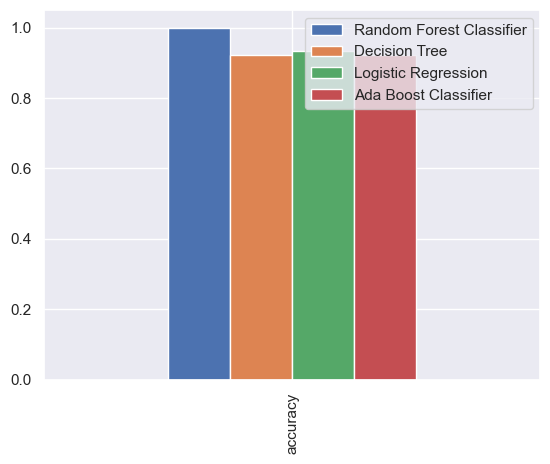

In [189]:
summary.plot.bar()

In [190]:
rfc_pred = model1.predict(X_test)
rfc_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0], dtype=int8)

In [191]:
dt_pred = model2.predict(X_test)
dt_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int8)

In [192]:
lr_pred = model3.predict(X_test)
lr_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0], dtype=int8)

In [193]:
ad_pred = model4.predict(X_test)
ad_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0], dtype=int8)

In [194]:
y_test.reset_index()
summary2 = pd.DataFrame()
summary2['rfc_pred']= rfc_pred
summary2['y_test'] = y_test
summary2

,rfc_pred,y_test
0,1,NaN
1,0,NaN
2,0,NaN
3,1,NaN
4,0,NaN
...,...,...
99,0,NaN
100,0,NaN
101,1,1.0
102,1,1.0


In [204]:
y_test

264    1
327    0
289    0
172    1
326    0
      ..
248    0
347    0
101    1
155    1
284    0
Name: class, Length: 104, dtype: int8

In [203]:
confusion_matrix(y_test,rfc_pred)

array([[38,  0],
       [ 0, 66]], dtype=int64)

In [205]:
y_test.reset_index()
summary2 = pd.DataFrame()
summary2['dt_pred']= dt_pred
summary2['y_test'] = y_test
summary2

,dt_pred,y_test
0,1,NaN
1,0,NaN
2,0,NaN
3,1,NaN
4,0,NaN
...,...,...
99,0,NaN
100,0,NaN
101,1,1.0
102,0,1.0


In [206]:
y_test

264    1
327    0
289    0
172    1
326    0
      ..
248    0
347    0
101    1
155    1
284    0
Name: class, Length: 104, dtype: int8

In [207]:
confusion_matrix(y_test,dt_pred)

array([[33,  5],
       [ 3, 63]], dtype=int64)

In [208]:
y_test.reset_index()
summary2 = pd.DataFrame()
summary2['lr_pred']= lr_pred
summary2['y_test'] = y_test
summary2

,lr_pred,y_test
0,1,NaN
1,0,NaN
2,0,NaN
3,1,NaN
4,0,NaN
...,...,...
99,0,NaN
100,1,NaN
101,1,1.0
102,1,1.0


In [209]:
y_test

264    1
327    0
289    0
172    1
326    0
      ..
248    0
347    0
101    1
155    1
284    0
Name: class, Length: 104, dtype: int8

In [210]:
confusion_matrix(y_test,lr_pred)

array([[36,  2],
       [ 5, 61]], dtype=int64)

In [211]:
y_test.reset_index()
summary2 = pd.DataFrame()
summary2['ad_pred']= ad_pred
summary2['y_test'] = y_test
summary2

,ad_pred,y_test
0,1,NaN
1,1,NaN
2,0,NaN
3,1,NaN
4,0,NaN
...,...,...
99,0,NaN
100,1,NaN
101,1,1.0
102,0,1.0


In [212]:
y_test

264    1
327    0
289    0
172    1
326    0
      ..
248    0
347    0
101    1
155    1
284    0
Name: class, Length: 104, dtype: int8

In [213]:
confusion_matrix(y_test,ad_pred)

array([[34,  4],
       [ 4, 62]], dtype=int64)